# Feature Engineering

Workflow: 4

Goal: Create new composite features for analysis.

Result: Outputs the file ```merge_feature.csv```.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import sys
sys.path.append('../')
import lego_helper as lh

## Import Data

In [4]:
MERGE_FILE = '../data/merge_full.csv'

In [5]:
set_df = pd.read_csv(MERGE_FILE)
set_df.head()
set_df.info()

,set_no,name,price_store,price_new,price_used,rating_value,rating_votes,theme_group,theme,subtheme,...,year,volume,weight,piece_cnt,minifig_cnt,number_parts,total_parts,number_colors,1st_color,2nd_color
0,858-1,Auto Engines,NaN,NaN,51.0,4.5,2.0,Technical,Technic,NaN,...,1980.0,NaN,NaN,242.0,0.0,46,242,5,Blue,Light Gray
1,1591-1,Danone Delivery Truck,NaN,129.0,28.0,NaN,NaN,Modern day,Town,Special,...,1980.0,NaN,NaN,40.0,0.0,19,40,4,White,Blue
2,1592-1,Town Square - Castle Scene,NaN,1168.0,191.0,4.8,4.0,Modern day,Town,Classic,...,1980.0,NaN,NaN,471.0,11.0,133,495,10,Black,Yellow
3,1651-2,Maersk Line Container Lorry,NaN,NaN,444.0,5.0,1.0,Modern day,Town,Special,...,1980.0,NaN,NaN,305.0,1.0,66,305,9,Maersk Blue,Light Gray
4,3634-1,Charlie Crow's Carry-All,NaN,90.0,13.0,3.0,1.0,Junior,Fabuland,NaN,...,1980.0,NaN,NaN,17.0,1.0,15,18,7,Yellow,Green


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 21 columns):
set_no           5303 non-null object
name             5303 non-null object
price_store      4178 non-null float64
price_new        5003 non-null float64
price_used       4972 non-null float64
rating_value     4560 non-null float64
rating_votes     4560 non-null float64
theme_group      5303 non-null object
theme            5303 non-null object
subtheme         3915 non-null object
main_tag         0 non-null float64
year             5303 non-null float64
volume           2143 non-null float64
weight           2154 non-null float64
piece_cnt        5296 non-null float64
minifig_cnt      5303 non-null float64
number_parts     5303 non-null int64
total_parts      5303 non-null int64
number_colors    5303 non-null int64
1st_color        5303 non-null object
2nd_color        5303 non-null object
dtypes: float64(11), int64(3), object(7)
memory usage: 870.1+ KB


## Investigate Surviving Sets

In [6]:
set_df['theme_group'].value_counts()

Modern day          1210
Licensed            1019
Action/Adventure     801
Model making         441
Historical           411
Constraction         391
Technical            379
Girls                285
Racing               218
Junior               148
Name: theme_group, dtype: int64

In [7]:
# there are too many themes, use the groups instead

set_df['theme'].value_counts().shape

(88,)

In [8]:
InteractiveShell.ast_node_interactivity = 'last'

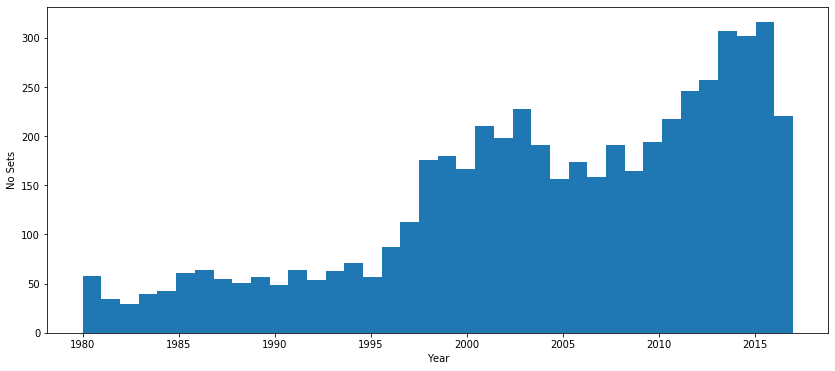

In [9]:
# sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='No Sets')
plt.show()

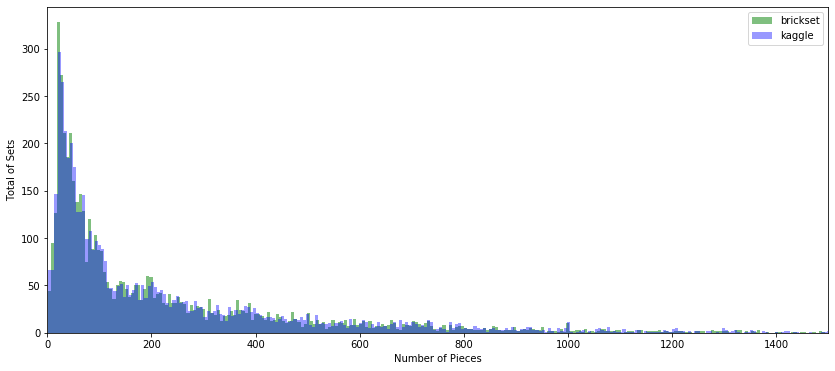

In [10]:
# piece count distribution brickset vs kaggle

piece_df = set_df.loc[(set_df['piece_cnt']>=1) & (set_df['total_parts']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.set(xlabel='Number of Pieces', ylabel='Total of Sets', xlim=(0, 1500))

axs.hist(piece_df['piece_cnt'].values, bins=1000, color='green', label='brickset', alpha=.5)
axs.hist(piece_df['total_parts'].values, bins=1000, color='blue', label='kaggle', alpha=.4)

plt.legend()
plt.show()

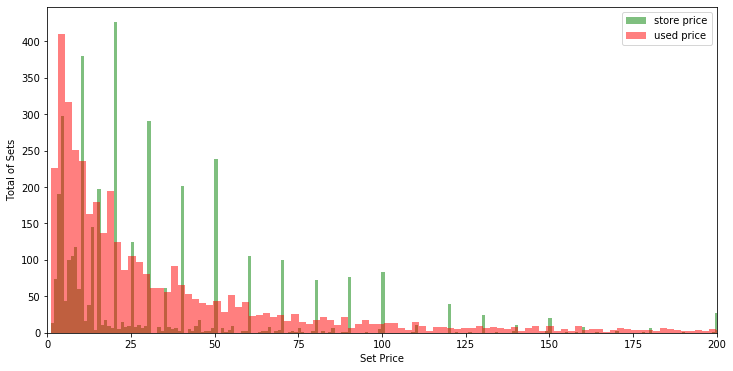

In [11]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(12, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

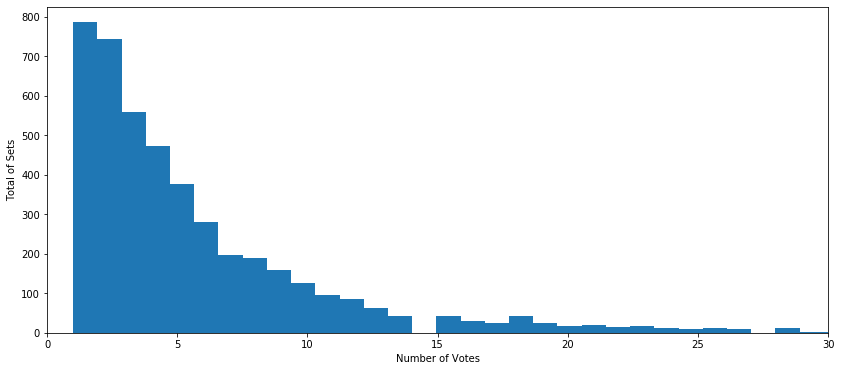

In [12]:
# since there aren't a lot of sets with high votes, the ratings aren't very reliable

votes_df = set_df.loc[set_df['rating_votes'].isna()==False]

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(votes_df['rating_votes'].values, bins=100)
axs.set(xlabel='Number of Votes', ylabel='Total of Sets', xlim=(0, 30))  # most votes ~100

plt.show()

## Clean the Colors

In [13]:
# check colors that are being used in sets

set_df['1st_color'].value_counts().head()

Black                2037
White                 869
Light Bluish Gray     432
Red                   310
Light Gray            295
Name: 1st_color, dtype: int64

In [14]:
# create new columns for super-colors 

set_df['scolor_1st'] = set_df['1st_color'].apply(lh.get_super_color)
set_df['scolor_2nd'] = set_df['2nd_color'].apply(lh.get_super_color)
set_df[['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd']].head()

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
0,858-1,Auto Engines,Technic,Blue,Blue,Light Gray,Gray
1,1591-1,Danone Delivery Truck,Town,White,White,Blue,Blue
2,1592-1,Town Square - Castle Scene,Town,Black,Black,Yellow,Yellow
3,1651-2,Maersk Line Container Lorry,Town,Maersk Blue,Blue,Light Gray,Gray
4,3634-1,Charlie Crow's Carry-All,Fabuland,Yellow,Yellow,Green,Green


In [15]:
# check for any remaining gaps 

set_df.loc[ (set_df['scolor_1st'].isna()) | (set_df['scolor_2nd'].isna()), 
            ['set_no', 'name', 'theme', '1st_color', 'scolor_1st', '2nd_color', 'scolor_2nd'] ]

,set_no,name,theme,1st_color,scolor_1st,2nd_color,scolor_2nd
429,8712-1,Technic Figures,Technic,Red,Red,[No Color],None
446,3647-1,Lionel Lion's Classroom,Fabuland,Yellow,Yellow,[No Color],None
716,8714-1,The LEGO Technic Guys,Technic,Trans-Clear,Transparent,[No Color],None
1565,8515-1,RoboRider Wheels,Technic,[No Color],None,[No Color],None
2015,3560-1,NBA Collectors # 1,Sports,Tan,Tan,[No Color],None
2017,3562-1,NBA Collectors # 3,Sports,Tan,Tan,[No Color],None
2020,3565-1,NBA Collectors # 6,Sports,Tan,Tan,[No Color],None
2021,3566-1,NBA Collectors # 7,Sports,Tan,Tan,[No Color],None
2723,9847-1,Bluetooth Dongle,Mindstorms,[No Color],None,[No Color],None
3441,2111-1,Kai,Ninjago,Red,Red,[No Color],None


In [16]:
# fix secondary colors by assigning primary color

set_df['scolor_2nd'] = set_df['scolor_2nd'].fillna(set_df['scolor_1st'])
set_df.loc[(set_df['scolor_2nd'].isna())].shape

(2, 23)

In [17]:
set_df['scolor_1st'].value_counts()

Black          2037
Gray           1026
White           869
Red             365
Yellow          300
Blue            240
Brown           139
Green           133
Tan             110
Transparent      75
Name: scolor_1st, dtype: int64

## Introduce Popularity

In [18]:
# popularity is a new feature for ratings

set_df['popularity'] = set_df['rating_value'] * set_df['rating_votes']
set_df['popularity'].head()

0     9.0
1     NaN
2    19.2
3     5.0
4     3.0
Name: popularity, dtype: float64

In [19]:
# visualize the popularity

popularity_df = set_df.loc[set_df['popularity'].isna()==False]
popularity_df.shape

(4560, 24)

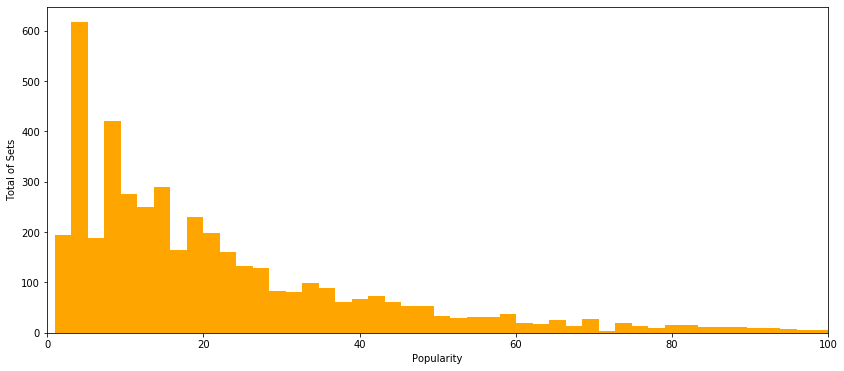

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(14, 6))

axs.hist(popularity_df['popularity'].values, bins=200, color='orange')
axs.set(xlabel='Popularity', ylabel='Total of Sets', xlim=(0, 100))  

plt.show()

## Introduce AfterMarket

In [21]:
# create aftermarket column 

set_df['aftermarket'] = set_df.apply(lh.get_aftermarket, axis=1)
set_df[['set_no', 'name', 'price_used', 'price_store', 'aftermarket']].head()

,set_no,name,price_used,price_store,aftermarket
0,858-1,Auto Engines,51.0,NaN,NaN
1,1591-1,Danone Delivery Truck,28.0,NaN,NaN
2,1592-1,Town Square - Castle Scene,191.0,NaN,NaN
3,1651-2,Maersk Line Container Lorry,444.0,NaN,NaN
4,3634-1,Charlie Crow's Carry-All,13.0,NaN,NaN


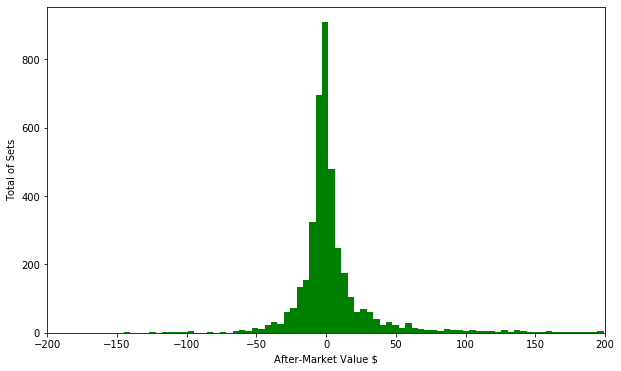

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')

axs.hist(set_df.loc[set_df['aftermarket'].isna()==False]['aftermarket'].values, bins=200, color='green')
axs.set(xlabel='After-Market Value $', ylabel='Total of Sets', xlim=(-200, 200))  

plt.show()

In [23]:
# compare positive and negative aftermarket per year

set_df.groupby(['year']).count()['set_no']

year
1980.0     58
1981.0     34
1982.0     29
1983.0     39
1984.0     43
1985.0     61
1986.0     64
1987.0     55
1988.0     51
1989.0     57
1990.0     49
1991.0     64
1992.0     54
1993.0     63
1994.0     71
1995.0     57
1996.0     87
1997.0    113
1998.0    176
1999.0    180
2000.0    167
2001.0    210
2002.0    198
2003.0    228
2004.0    191
2005.0    156
2006.0    174
2007.0    158
2008.0    191
2009.0    165
2010.0    194
2011.0    217
2012.0    246
2013.0    257
2014.0    307
2015.0    302
2016.0    316
2017.0    221
Name: set_no, dtype: int64

In [24]:
increase_df = set_df.loc[set_df['aftermarket']>0]

increase_df.shape

(1868, 25)

In [25]:
decrease_df = set_df.loc[set_df['aftermarket']<=0]

decrease_df.shape

(2167, 25)

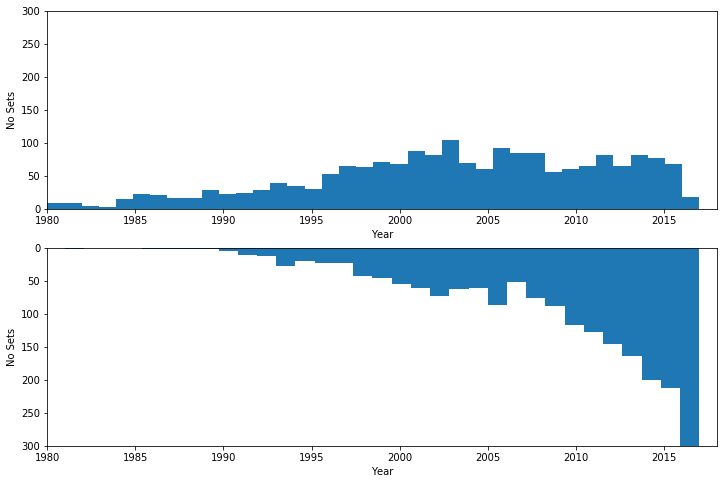

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].hist(increase_df['year'].values, bins=increase_df['year'].unique().shape[0])
axs[0].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 300))

axs[1].hist(decrease_df['year'].values, bins=decrease_df['year'].unique().shape[0])
axs[1].set(xlabel='Year', ylabel='No Sets', xlim=(1980, 2018), ylim=(0, 300))
axs[1].set_ylim(axs[1].get_ylim()[::-1])

plt.show()

## Clean the Features Dataset

In [27]:
set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 25 columns):
set_no           5303 non-null object
name             5303 non-null object
price_store      4178 non-null float64
price_new        5003 non-null float64
price_used       4972 non-null float64
rating_value     4560 non-null float64
rating_votes     4560 non-null float64
theme_group      5303 non-null object
theme            5303 non-null object
subtheme         3915 non-null object
main_tag         0 non-null float64
year             5303 non-null float64
volume           2143 non-null float64
weight           2154 non-null float64
piece_cnt        5296 non-null float64
minifig_cnt      5303 non-null float64
number_parts     5303 non-null int64
total_parts      5303 non-null int64
number_colors    5303 non-null int64
1st_color        5303 non-null object
2nd_color        5303 non-null object
scolor_1st       5294 non-null object
scolor_2nd       5301 non-null object
popularity    

In [28]:
set_clean_df = set_df[['set_no', 'name', 
                       'price_store', 'price_used', 'aftermarket', 'popularity', 
                       'theme_group', 'year', 'volume', 'weight', 'total_parts', 'number_parts', 
                       'number_colors', 'scolor_1st', 'scolor_2nd']]
set_clean_df = set_clean_df.rename(columns={'theme_group': 'group'})
set_clean_df[2200:2205]

,set_no,name,price_store,price_used,aftermarket,popularity,group,year,volume,weight,total_parts,number_parts,number_colors,scolor_1st,scolor_2nd
2200,10029-1,Lunar Lander,40.0,236.0,196.0,12.9,Modern day,2003.0,NaN,NaN,476,133,12,Gray,Tan
2201,10041-1,Main Street,65.0,98.0,33.0,44.0,Modern day,2003.0,NaN,NaN,649,161,11,Red,White
2202,10121-1,NBA Basketball Teams,10.0,NaN,NaN,NaN,Modern day,2003.0,NaN,NaN,16,8,3,White,Yellow
2203,10123-1,Cloud City,100.0,778.0,678.0,70.5,Licensed,2003.0,NaN,NaN,722,224,18,Gray,Gray
2204,10124-1,Wright Flyer,60.0,204.0,144.0,15.2,Model making,2003.0,NaN,NaN,677,125,5,Brown,Black


In [29]:
set_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 15 columns):
set_no           5303 non-null object
name             5303 non-null object
price_store      4178 non-null float64
price_used       4972 non-null float64
aftermarket      4035 non-null float64
popularity       4560 non-null float64
group            5303 non-null object
year             5303 non-null float64
volume           2143 non-null float64
weight           2154 non-null float64
total_parts      5303 non-null int64
number_parts     5303 non-null int64
number_colors    5303 non-null int64
scolor_1st       5294 non-null object
scolor_2nd       5301 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 621.5+ KB


In [30]:
save_path = r'../data/merge_feature.csv'
set_clean_df.to_csv(save_path, index=False)
f'{round(os.path.getsize(save_path) /1e6, 2)} mb'

'0.51 mb'